In [1]:
pip install pandas scikit-learn statsmodels

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox
import gc
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/adeulofeu/TFM/refs/heads/main/data/dataset_modelos.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Unnamed: 0,Fecha,Demanda Energia SIN kWh,Generación kWh,Demanda No Atendida kWh,Exportaciones kWh,Importaciones kWh,Población,Temp_BOGOTA,Temp_ANTIOQUIA,Temp_VALLE DEL CAUCA,Temp_ATLANTICO,Temp_BOLIVAR,Temp_CUNDINAMARCA,Temp_NORTE DE SANTANDER,Temp_SANTANDER,Temp_CESAR,Temp_META
0,0,2007-01-01,1.098662e+08,1.133512e+08,14410.0,3499392.00,NaN,42658630,13.458333,20.046262,23.500690,27.483333,28.254167,15.136742,21.241667,19.148125,24.793750,26.762500
1,1,2007-01-02,1.323110e+08,1.353954e+08,5910.0,3299095.66,208776.0,42658630,13.854167,20.144860,23.591034,27.595833,28.347826,15.391473,21.127143,18.432298,25.540426,27.483333
2,2,2007-01-03,1.388197e+08,1.421048e+08,10070.0,3295124.41,NaN,42658630,13.858333,20.355288,23.532168,27.345833,27.854167,15.301961,20.230556,18.647799,25.197872,26.754167
3,3,2007-01-04,1.405693e+08,1.439118e+08,19150.0,3361720.48,NaN,42658630,14.137500,19.365196,22.783333,27.125000,27.383333,15.016988,20.411429,19.040000,24.765957,26.987500
4,4,2007-01-05,1.410687e+08,1.442180e+08,161380.0,3310620.07,NaN,42658630,14.169565,19.649275,23.177778,26.595652,27.762500,15.871094,20.475000,19.773856,24.429167,26.429167


In [6]:
df.describe()

,Unnamed: 0,Demanda Energia SIN kWh,Generación kWh,Demanda No Atendida kWh,Exportaciones kWh,Importaciones kWh,Población,Temp_BOGOTA,Temp_ANTIOQUIA,Temp_VALLE DEL CAUCA,Temp_ATLANTICO,Temp_BOLIVAR,Temp_CUNDINAMARCA,Temp_NORTE DE SANTANDER,Temp_SANTANDER,Temp_CESAR,Temp_META
count,6208.000000,6.208000e+03,6.208000e+03,5.721000e+03,5.745000e+03,4.959000e+03,6.208000e+03,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000,6208.000000
mean,3103.500000,1.771210e+08,1.779812e+08,1.620205e+05,2.008593e+06,1.063098e+06,4.693996e+07,14.475713,19.850448,20.389151,27.210054,27.886333,15.507632,21.309294,17.960342,24.883022,24.308416
std,1792.239567,2.518140e+07,2.441339e+07,3.558010e+05,2.966301e+06,2.192694e+06,3.001601e+06,1.196459,1.509546,2.719038,4.214228,1.279226,1.895323,3.665147,2.902498,2.754527,2.676621
min,0.000000,1.098662e+08,1.111759e+08,1.000000e+03,3.000000e+01,6.000000e-02,4.265863e+07,0.000000,9.546667,0.000000,0.000000,20.885714,9.714634,0.000000,4.793750,13.566667,6.400000
25%,1551.750000,1.571382e+08,1.595875e+08,2.903000e+04,8.859390e+03,4.246705e+03,4.455342e+07,13.860013,18.865678,19.157468,27.054167,27.133163,14.249604,19.311314,17.090571,22.815758,23.094490
50%,3103.500000,1.766982e+08,1.779259e+08,7.547000e+04,6.828579e+05,2.387018e+04,4.631390e+07,14.489313,19.864502,20.792335,27.921286,28.021433,15.279410,20.847728,18.612998,24.429846,24.672854
75%,4655.250000,1.952696e+08,1.940941e+08,1.813200e+05,3.143390e+06,6.197544e+05,4.939568e+07,15.116667,20.898439,22.082461,28.700000,28.638246,16.383004,22.967935,19.690532,26.684865,26.031850
max,6207.000000,2.408332e+08,2.504391e+08,1.720827e+07,3.505239e+07,1.091103e+07,5.221550e+07,20.362486,26.704545,34.000000,34.100000,32.900000,30.541667,32.650000,34.716667,34.650000,31.197059


In [7]:
nombres_columnas = df.columns.tolist()

# Mostrar los nombres de las columnas
print(nombres_columnas)

['Unnamed: 0', 'Fecha', 'Demanda Energia SIN kWh', 'Generación kWh', 'Demanda No Atendida kWh', 'Exportaciones kWh', 'Importaciones kWh', 'Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']


In [8]:
# Convertir la columna 'fecha' en índice de tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6208 entries, 2007-01-01 to 2023-12-31
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               6208 non-null   int64  
 1   Demanda Energia SIN kWh  6208 non-null   float64
 2   Generación kWh           6208 non-null   float64
 3   Demanda No Atendida kWh  5721 non-null   float64
 4   Exportaciones kWh        5745 non-null   float64
 5   Importaciones kWh        4959 non-null   float64
 6   Población                6208 non-null   int64  
 7   Temp_BOGOTA              6208 non-null   float64
 8   Temp_ANTIOQUIA           6208 non-null   float64
 9   Temp_VALLE DEL CAUCA     6208 non-null   float64
 10  Temp_ATLANTICO           6208 non-null   float64
 11  Temp_BOLIVAR             6208 non-null   float64
 12  Temp_CUNDINAMARCA        6208 non-null   float64
 13  Temp_NORTE DE SANTANDER  6208 non-null   float64
 14  Temp_S

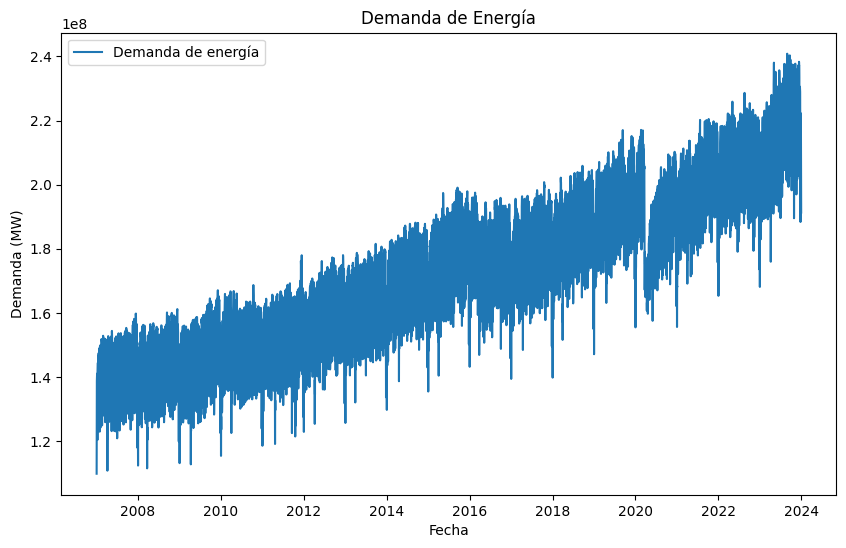

In [9]:
# Inspeccionar datos
df.head()
df.info()

# Visualizar la demanda de energía
plt.figure(figsize=(10, 6))
plt.plot(df['Demanda Energia SIN kWh'], label='Demanda de energía')
plt.title('Demanda de Energía')
plt.xlabel('Fecha')
plt.ylabel('Demanda (MW)')
plt.legend()
plt.show()

## **Se realiza rellenar valores nulos con el promedio del mismo año**

In [10]:
print(df.isnull().sum())

Unnamed: 0                    0
Demanda Energia SIN kWh       0
Generación kWh                0
Demanda No Atendida kWh     487
Exportaciones kWh           463
Importaciones kWh          1249
Población                     0
Temp_BOGOTA                   0
Temp_ANTIOQUIA                0
Temp_VALLE DEL CAUCA          0
Temp_ATLANTICO                0
Temp_BOLIVAR                  0
Temp_CUNDINAMARCA             0
Temp_NORTE DE SANTANDER       0
Temp_SANTANDER                0
Temp_CESAR                    0
Temp_META                     0
dtype: int64


In [11]:
# Rellenar 'Demanda No Atendida kWh' con el promedio del mismo año
df['Demanda No Atendida kWh'] = df.groupby(df.index.year)['Demanda No Atendida kWh'].transform(lambda x: x.fillna(x.mean()))

# Rellenar 'Exportaciones kWh' con el promedio del mismo año
df['Exportaciones kWh'] = df.groupby(df.index.year)['Exportaciones kWh'].transform(lambda x: x.fillna(x.mean()))


df['Importaciones kWh'] = df.groupby(df.index.year)['Importaciones kWh'].transform(lambda x: x.fillna(x.mean()))



In [12]:
print(df.isnull().sum())

Unnamed: 0                 0
Demanda Energia SIN kWh    0
Generación kWh             0
Demanda No Atendida kWh    0
Exportaciones kWh          0
Importaciones kWh          0
Población                  0
Temp_BOGOTA                0
Temp_ANTIOQUIA             0
Temp_VALLE DEL CAUCA       0
Temp_ATLANTICO             0
Temp_BOLIVAR               0
Temp_CUNDINAMARCA          0
Temp_NORTE DE SANTANDER    0
Temp_SANTANDER             0
Temp_CESAR                 0
Temp_META                  0
dtype: int64


In [13]:
df = df.sort_index()  # Ordenar el DataFrame por fecha si no está ordenado

In [14]:
df.tail()

,Unnamed: 0,Demanda Energia SIN kWh,Generación kWh,Demanda No Atendida kWh,Exportaciones kWh,Importaciones kWh,Población,Temp_BOGOTA,Temp_ANTIOQUIA,Temp_VALLE DEL CAUCA,Temp_ATLANTICO,Temp_BOLIVAR,Temp_CUNDINAMARCA,Temp_NORTE DE SANTANDER,Temp_SANTANDER,Temp_CESAR,Temp_META
Fecha,,,,,,,,,,,,,,,,,
2023-12-27,6203,2.222968e+08,2.227606e+08,431130.000000,900525.04,5571.78,52215503,14.489313,15.786195,34.000000,28.009054,28.638246,15.813183,24.681915,20.781655,29.125171,25.601667
2023-12-28,6204,2.212095e+08,2.211956e+08,1600.000000,2787.56,15077.68,52215503,14.489313,15.786195,30.700000,27.780405,28.638246,15.643810,25.523538,20.500995,29.669660,25.601667
2023-12-29,6205,2.162844e+08,2.167466e+08,44720.000000,519583.88,12665.88,52215503,14.489313,15.786195,28.352778,28.223212,28.638246,15.298540,25.385221,20.401481,28.628650,25.601667
2023-12-30,6206,2.045570e+08,2.045242e+08,28220.000000,10645.40,15276.66,52215503,14.489313,15.786195,26.311594,28.475236,28.638246,15.799285,25.616028,19.548624,29.072752,25.601667
2023-12-31,6207,1.913121e+08,1.913115e+08,199893.198758,7626.41,8280.34,52215503,14.489313,15.786195,26.643182,28.119324,28.638246,15.870036,25.500676,20.387347,28.451548,25.601667


## Verificación de la estacionareidad

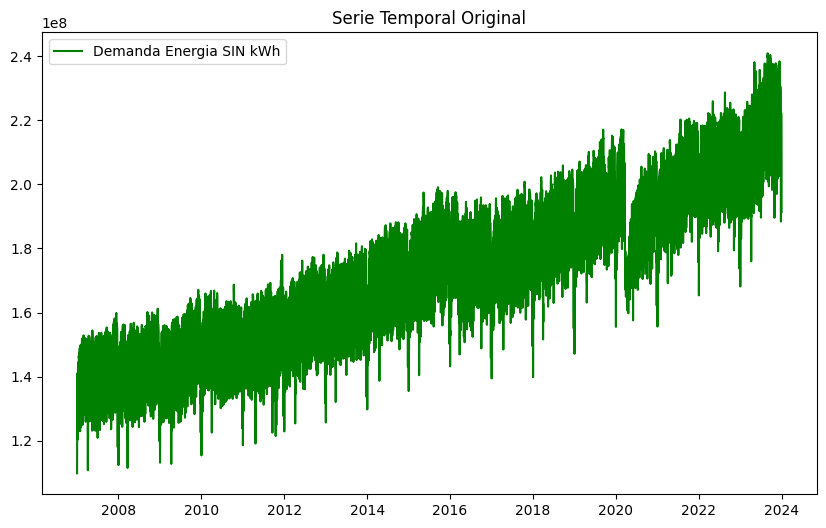

Estadístico de la prueba ADF: -1.5910591130047262
Valor p: 0.48808325967315325
La serie temporal no es estacionaria (no rechazamos la hipótesis nula).


In [15]:
# Visualizar solo la columna 'Demanda Energia SIN kWh'
plt.figure(figsize=(10, 6))
plt.plot(df['Demanda Energia SIN kWh'], label='Demanda Energia SIN kWh', color='green')
plt.title("Serie Temporal Original")
plt.legend()
plt.show()

# Prueba ADF
result = adfuller(df['Demanda Energia SIN kWh'])
print('Estadístico de la prueba ADF:', result[0])
print('Valor p:', result[1])

if result[1] < 0.05:
    print("La serie temporal es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La serie temporal no es estacionaria (no rechazamos la hipótesis nula).")


## Verificar correlaciones

In [16]:
correlations = df.corr()
print(correlations['Demanda Energia SIN kWh'])

Unnamed: 0                 0.878543
Demanda Energia SIN kWh    1.000000
Generación kWh             0.987756
Demanda No Atendida kWh   -0.015658
Exportaciones kWh         -0.160519
Importaciones kWh          0.337834
Población                  0.866383
Temp_BOGOTA               -0.071758
Temp_ANTIOQUIA             0.193795
Temp_VALLE DEL CAUCA       0.075480
Temp_ATLANTICO             0.152771
Temp_BOLIVAR               0.125394
Temp_CUNDINAMARCA          0.302955
Temp_NORTE DE SANTANDER   -0.273055
Temp_SANTANDER             0.383110
Temp_CESAR                 0.080189
Temp_META                 -0.103112
Name: Demanda Energia SIN kWh, dtype: float64


Correlación de Pearson

In [17]:
from scipy.stats import pearsonr

for column in ['Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']:
    correlation, p_value = pearsonr(df['Demanda Energia SIN kWh'], df[column])
    print(f"Correlación entre Demanda y {column}: {correlation}")
    print(f"Valor p: {p_value}")
    if p_value < 0.05:
        print(f"La correlación entre Demanda y {column} es significativa.\n")
    else:
        print(f"La correlación entre Demanda y {column} no es significativa.\n")

Correlación entre Demanda y Población: 0.866382692723172
Valor p: 0.0
La correlación entre Demanda y Población es significativa.

Correlación entre Demanda y Temp_BOGOTA: -0.07175781949184631
Valor p: 1.5135610733040238e-08
La correlación entre Demanda y Temp_BOGOTA es significativa.

Correlación entre Demanda y Temp_ANTIOQUIA: 0.19379458051045312
Valor p: 1.348983664307284e-53
La correlación entre Demanda y Temp_ANTIOQUIA es significativa.

Correlación entre Demanda y Temp_VALLE DEL CAUCA: 0.07547973398378091
Valor p: 2.610103465455994e-09
La correlación entre Demanda y Temp_VALLE DEL CAUCA es significativa.

Correlación entre Demanda y Temp_ATLANTICO: 0.15277093213442405
Valor p: 9.858439707000726e-34
La correlación entre Demanda y Temp_ATLANTICO es significativa.

Correlación entre Demanda y Temp_BOLIVAR: 0.12539399669148116
Valor p: 3.508862427676353e-23
La correlación entre Demanda y Temp_BOLIVAR es significativa.

Correlación entre Demanda y Temp_CUNDINAMARCA: 0.3029552423180653


In [18]:
df = df.asfreq('D')
df = df.fillna(method='ffill')

<ipython-input-18-3489a1b712d0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [19]:
df.head()

,Unnamed: 0,Demanda Energia SIN kWh,Generación kWh,Demanda No Atendida kWh,Exportaciones kWh,Importaciones kWh,Población,Temp_BOGOTA,Temp_ANTIOQUIA,Temp_VALLE DEL CAUCA,Temp_ATLANTICO,Temp_BOLIVAR,Temp_CUNDINAMARCA,Temp_NORTE DE SANTANDER,Temp_SANTANDER,Temp_CESAR,Temp_META
Fecha,,,,,,,,,,,,,,,,,
2007-01-01,0.0,1.098662e+08,1.133512e+08,14410.0,3499392.00,179725.068682,42658630.0,13.458333,20.046262,23.500690,27.483333,28.254167,15.136742,21.241667,19.148125,24.793750,26.762500
2007-01-02,1.0,1.323110e+08,1.353954e+08,5910.0,3299095.66,208776.000000,42658630.0,13.854167,20.144860,23.591034,27.595833,28.347826,15.391473,21.127143,18.432298,25.540426,27.483333
2007-01-03,2.0,1.388197e+08,1.421048e+08,10070.0,3295124.41,179725.068682,42658630.0,13.858333,20.355288,23.532168,27.345833,27.854167,15.301961,20.230556,18.647799,25.197872,26.754167
2007-01-04,3.0,1.405693e+08,1.439118e+08,19150.0,3361720.48,179725.068682,42658630.0,14.137500,19.365196,22.783333,27.125000,27.383333,15.016988,20.411429,19.040000,24.765957,26.987500
2007-01-05,4.0,1.410687e+08,1.442180e+08,161380.0,3310620.07,179725.068682,42658630.0,14.169565,19.649275,23.177778,26.595652,27.762500,15.871094,20.475000,19.773856,24.429167,26.429167


# **Modelo ARIMAX**

###  Dividir el dataset en train y en test

Se divide no por medio de split sino por diferencia de fechas debido a que los rangos no son exactos en el 70% 30%

In [20]:
# Asegúrate de que los datos estén ordenados por fecha
df = df.sort_index()  # Esto ordena el DataFrame por el índice, que es 'Fecha'

# Dividir en entrenamiento y prueba según una fecha
train = df[df.index <= '2017-12-31']  # Datos hasta el final de 2017
test = df[df.index > '2017-12-31']    # Datos de 2018 en adelante

# Extraer X (exógenas) y y (dependiente) para entrenamiento y prueba
# Asegúrate de que solo 'Precipitacion (mm)' y 'Temperatura' estén en X
train_X = train[['Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas: Temperatura
train_y = train['Demanda Energia SIN kWh']  # Variable dependiente: Demanda Energia
test_X = test[['Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas en test
test_y = test['Demanda Energia SIN kWh']  # Variable dependiente en test


In [21]:
# Verificar cuántos datos hay en los conjuntos de entrenamiento y prueba
train_size = len(train_X)
test_size = len(test_X)

# Mostrar los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {train_size} datos")
print(f"Tamaño del conjunto de prueba: {test_size} datos")

# Verificar si cumplen con el 70% y 30%
total_size = train_size + test_size
train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

print(f"Porcentaje de datos en el conjunto de entrenamiento: {train_percentage:.2f}%")
print(f"Porcentaje de datos en el conjunto de prueba: {test_percentage:.2f}%")


Tamaño del conjunto de entrenamiento: 4018 datos
Tamaño del conjunto de prueba: 2191 datos
Porcentaje de datos en el conjunto de entrenamiento: 64.71%
Porcentaje de datos en el conjunto de prueba: 35.29%


### Verificar estacionareidad

In [22]:
from statsmodels.tsa.stattools import adfuller

# Función para verificar la estacionariedad
def test_stationarity(series):
    result = adfuller(series)
    print("Estadístico ADF:", result[0])
    print("p-value:", result[1])
    print("Valores críticos:", result[4])
    return result[1]

# Verificar la estacionariedad de la serie dependiente
p_value = test_stationarity(train_y)

if p_value > 0.05:
    print("Serie no estacionaria, se aplica diferenciación en el modelo.")
else:
    print("Serie ya es estacionaria.")


Estadístico ADF: -2.3510188487182386
p-value: 0.15604063919061312
Valores críticos: {'1%': -3.431991624746321, '5%': -2.8622653800145192, '10%': -2.5671561276258172}
Serie no estacionaria, se aplica diferenciación en el modelo.


### Verificar la multicolinealidad

In [23]:
# Agregar una constante para la regresión
X_with_const = add_constant(train_X)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Mostrar los resultados del VIF
print(vif_data)


                   Variable          VIF
0                     const  1785.313851
1                 Población     1.727935
2               Temp_BOGOTA     1.196673
3            Temp_ANTIOQUIA     1.399692
4      Temp_VALLE DEL CAUCA     1.463344
5            Temp_ATLANTICO     1.386794
6              Temp_BOLIVAR     1.389743
7         Temp_CUNDINAMARCA     1.495534
8   Temp_NORTE DE SANTANDER     1.547709
9            Temp_SANTANDER     1.307075
10               Temp_CESAR     1.394964
11                Temp_META     1.340388


Las varibles no son multicolinealidades porque los valores son cercanos a 1

### Aplicar ACF y PACF para determinar los valores de 𝑝 y 𝑞

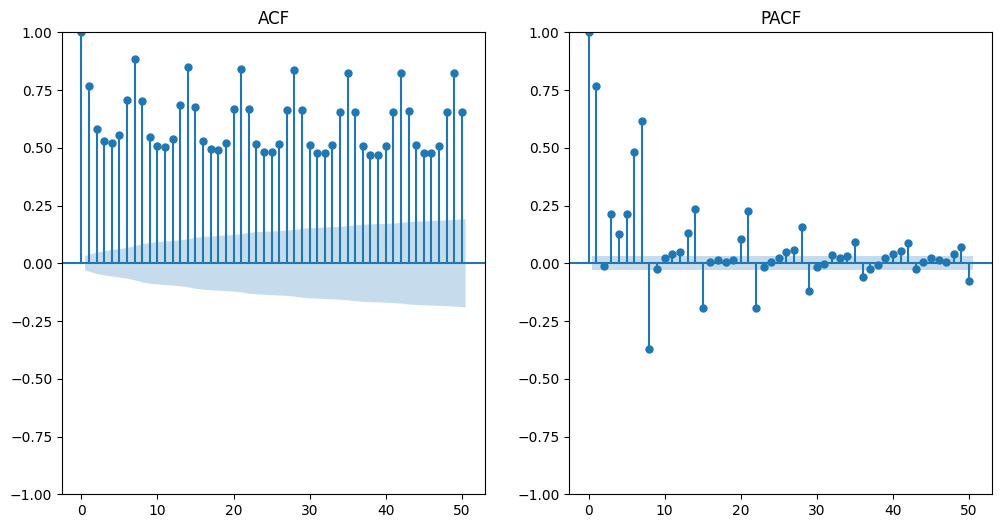

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF para la serie dependiente
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(train_y, ax=plt.gca(), lags=50)
plt.title('ACF')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(train_y, ax=plt.gca(), lags=50)
plt.title('PACF')

plt.show()


### Implementación del modelo

Verificación del mejor modelo

In [25]:
# Rango de valores para p, d, q
p_values = [1, 2]  # Establecer los valores de p
d_values = [1]  # Establecer los va lores de d
q_values = [1, 2, 3]  # Establecer los valores de q

# Crear un dataframe para almacenar los resultados de todos los modelos
all_results = []

# Función para calcular MAPE
def mape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


# Función para ajustar y evaluar cada modelo
def evaluate_model(p, d, q):
    try:
        # Ajustar el modelo ARIMAX
        model_arimax = ARIMA(train_y, exog=train_X, order=(p, d, q))
        model_arimax_fit = model_arimax.fit()

        # Predicciones en el conjunto de entrenamiento
        train_predictions = model_arimax_fit.predict(start=0, end=len(train_y)-1, exog=train_X)

        # Predicciones en el conjunto de prueba
        test_predictions = model_arimax_fit.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1, exog=test_X)

        # Calcular los errores de entrenamiento
        mae_train = mean_absolute_error(train_y, train_predictions)
        rmse_train = np.sqrt(mean_squared_error(train_y, train_predictions))
        mape_train = mape(train_y, train_predictions)

        # Calcular los errores de prueba
        mae_test = mean_absolute_error(test_y, test_predictions)
        rmse_test = np.sqrt(mean_squared_error(test_y, test_predictions))
        mape_test = mape(test_y, test_predictions)

        # Relación entre variables

        mean_y = np.mean(df['Demanda Energia SIN kWh'])

        rmse_percentage_train = (rmse_train / mean_y) * 100
        mae_percentage_train = (mae_train / mean_y) * 100

        rmse_percentage_test = (rmse_test / mean_y) * 100
        mae_percentage_test = (mae_test / mean_y) * 100

        # Calcular AIC
        aic = model_arimax_fit.aic

        # Calcular BIC
        bic = model_arimax_fit.bic

        # Obtener los residuos
        residuos = model_arimax_fit.resid

        # Agregar constante a las variables exógenas para la prueba de Breusch-Pagan
        train_X_const = add_constant(train_X)  # Esto agrega la constante a las variables exógenas

        # Realizar la prueba de Breusch-Pagan
        bp_test = het_breuschpagan(residuos, train_X_const)
        bp_pvalue = bp_test[1]

        # Realizar la prueba de Jarque-Bera
        jb_stat, jb_pvalue = jarque_bera(residuos)

        # Ljung-Box
        lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)



        # Almacenar los resultados sin verificar las condiciones
        return {
            'p': p,
            'd': d,
            'q': q,
            'rmse_percentage_train': rmse_percentage_train,
            'mae_percentage_train': mae_percentage_train,
            'rmse_percentage_test': rmse_percentage_test,
            'mae_percentage_test': mae_percentage_test,
            'MAE_train': mae_train,
            'RMSE_train': rmse_train,
            'MAPE_train': mape_train,
            'MAE_test': mae_test,
            'RMSE_test': rmse_test,
            'MAPE_test': mape_test,
            'AIC': aic,
            'BIC': bic,
            'bp_pvalue': bp_pvalue,
            'jb_pvalue': jb_pvalue,
            'lb_pvalue': lb_test['lb_pvalue'][10],  # Solo tomar el valor de p-valor de la prueba de Ljung-Box para el lag 10
            'MAE_diff': mae_percentage_train - mae_percentage_test,  # Diferencia MAE (test - train)
            'RMSE_diff': rmse_percentage_test - rmse_percentage_train,  # Diferencia RMSE (test - train)
            'MAPE_diff': mape_test - mape_train  # Diferencia MAPE (test - train)
        }


        return result

    except Exception as e:
        # Si ocurre algún error, lo ignoramos y continuamos
        print(f"Error con el modelo ARIMA({p}, {d}, {q}): {e}")
        return None

# Generar todas las combinaciones posibles de p, d y q
combinations = [(p, d, q) for p in p_values for d in d_values for q in q_values]

# Evaluar cada modelo secuencialmente
for p, d, q in combinations:
    print(f"Evaluando modelo ARIMA({p}, {d}, {q})...")

    # Evaluar el modelo y obtener los resultados
    result = evaluate_model(p, d, q)

    if result is not None:
        # Si el modelo es válido, agregarlo a los resultados
        all_results.append(result)

    # Limpiar la memoria después de cada iteración
    gc.collect()

# Convertir los resultados a un DataFrame
all_results_df = pd.DataFrame(all_results)

# Mostrar los resultados de todos los modelos evaluados
if not all_results_df.empty:
    print("Todos los modelos fueron evaluados")
else:
    print("No se evaluaron modelos correctamente.")


Evaluando modelo ARIMA(1, 1, 1)...
Evaluando modelo ARIMA(1, 1, 2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Evaluando modelo ARIMA(1, 1, 3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluando modelo ARIMA(2, 1, 1)...
Evaluando modelo ARIMA(2, 1, 2)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluando modelo ARIMA(2, 1, 3)...


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Todos los modelos fueron evaluados


In [26]:
all_results_df.head(15)

,p,d,q,rmse_percentage_train,mae_percentage_train,rmse_percentage_test,mae_percentage_test,MAE_train,RMSE_train,MAPE_train,...,RMSE_test,MAPE_test,AIC,BIC,bp_pvalue,jb_pvalue,lb_pvalue,MAE_diff,RMSE_diff,MAPE_diff
0,1,1,1,5.806709,4.774153,9.798599,8.421962,8.456078e+06,1.028496e+07,5.310089,...,1.735548e+07,7.474923,141239.249072,141327.425141,0.033429,1.023576e-119,0.000000e+00,-3.647809,3.991890,2.164834
1,1,1,2,5.643383,4.562470,10.119433,8.688316,8.081141e+06,9.995676e+06,5.086538,...,1.792375e+07,7.717786,140932.634361,141027.108721,0.035869,4.710410e-78,0.000000e+00,-4.125846,4.476050,2.631248
2,1,1,3,5.592423,4.599714,10.224858,8.780052,8.147108e+06,9.905415e+06,5.121253,...,1.811048e+07,7.801879,141025.535042,141126.307692,0.013899,6.428812e-73,0.000000e+00,-4.180338,4.632435,2.680625
3,2,1,1,19.703165,5.036716,115.547297,107.678923,8.921135e+06,3.489865e+07,5.423815,...,2.046598e+08,152.622424,142456.578262,142551.052621,0.723781,0.000000e+00,1.394938e-05,-102.642207,95.844132,147.198609
4,2,1,2,16.932198,5.010358,98.064295,91.040295,8.874450e+06,2.999066e+07,5.390607,...,1.736935e+08,134.810601,142281.556672,142382.329322,0.720668,0.000000e+00,2.401949e-09,-86.029937,81.132097,129.419993
5,2,1,3,18.710691,5.097166,110.053340,102.342661,9.028206e+06,3.314076e+07,5.375528,...,1.949288e+08,147.978481,141196.699967,141303.770908,0.726091,0.000000e+00,6.079869e-04,-97.245496,91.342649,142.602953


In [27]:
all_results_df.to_csv('resultados_modelos.csv', index=False)

print("Los resultados han sido exportados a 'resultados_modelos.csv'")

Los resultados han sido exportados a 'resultados_modelos.csv'


<ipython-input-28-3dfbd1e3d198>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_df[['p', 'd', 'q']].apply(lambda x: f'({x[0]}, {x[1]}, {x[2]})', axis=1),
<ipython-input-28-3dfbd1e3d198>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_df[['p', 'd', 'q']].apply(lambda x: f'({x[0]}, {x[1]}, {x[2]})', axis=1),
<ipython-input-28-3dfbd1e3d198>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_df[['p', 'd', 'q']

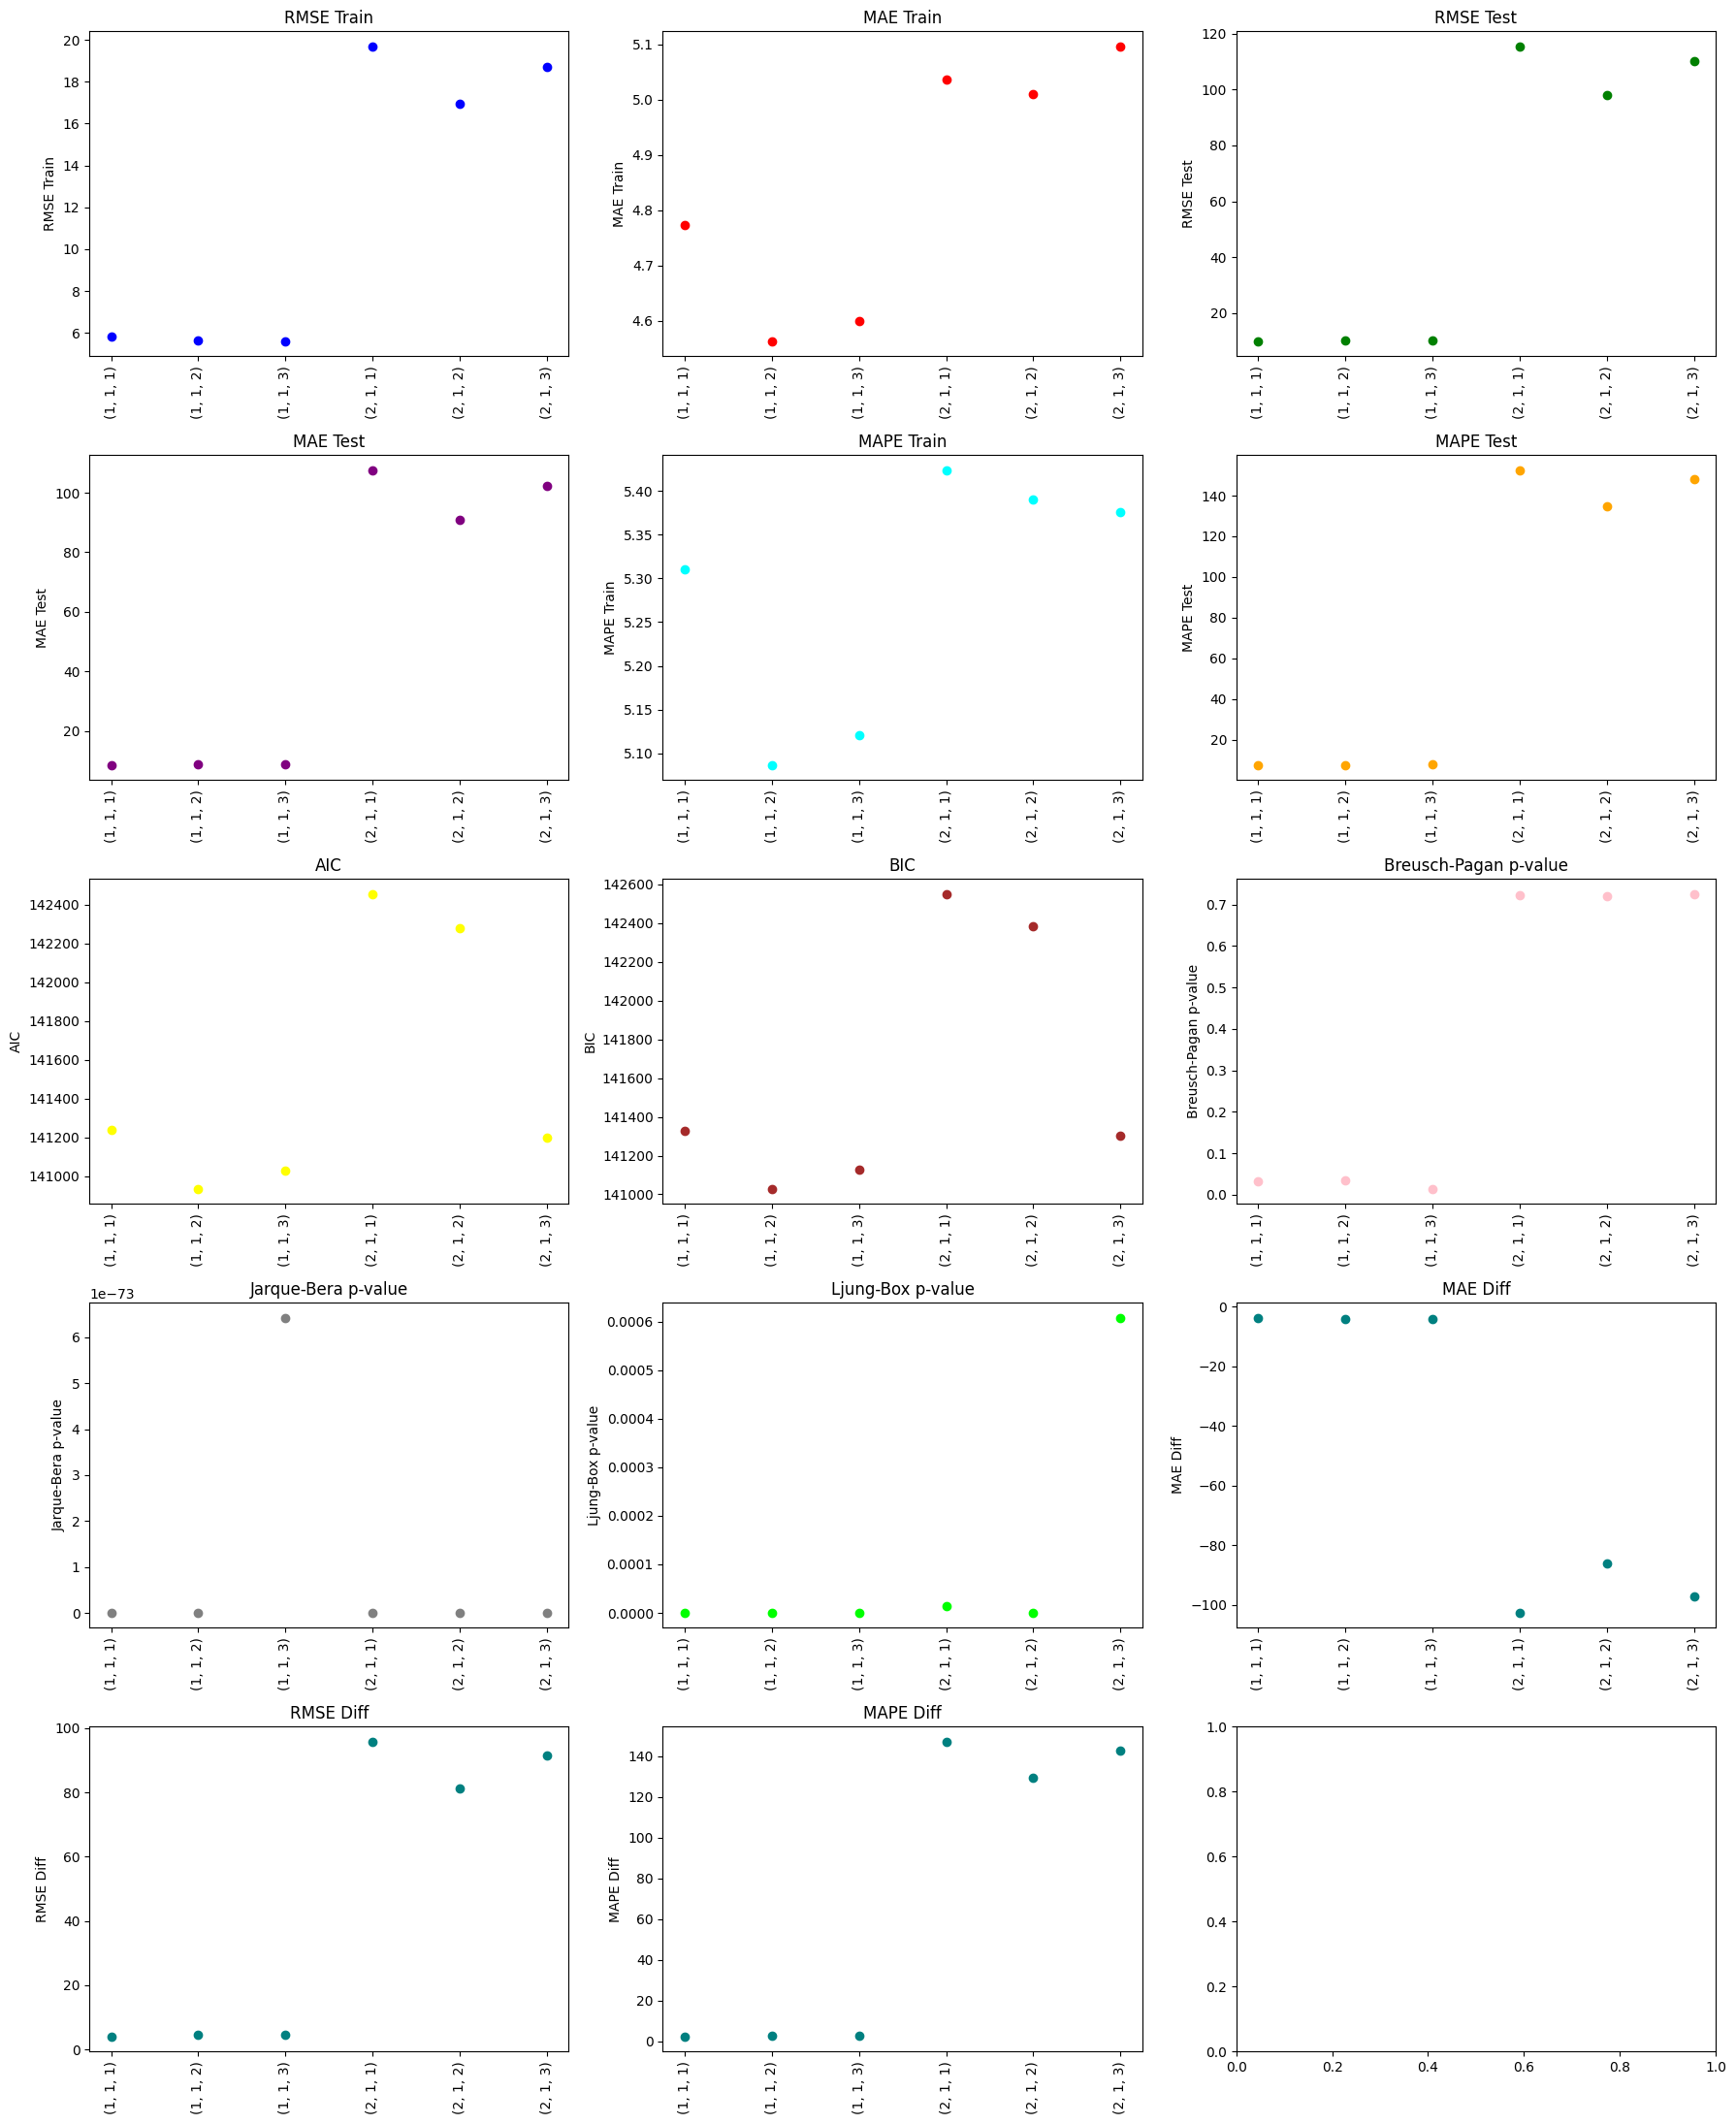

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que los resultados están en un DataFrame llamado 'results_df'
results_df = all_results_df

# Crear un gráfico de dispersión para cada métrica
fig, axs = plt.subplots(5, 3, figsize=(18, 22))  # Ahora 5 filas para incluir las nuevas métricas

# Lista de métricas a graficar
metrics = [
    ('rmse_percentage_train', 'RMSE Train', 'blue'),
    ('mae_percentage_train', 'MAE Train', 'red'),
    ('rmse_percentage_test', 'RMSE Test', 'green'),
    ('mae_percentage_test', 'MAE Test', 'purple'),
    ('MAPE_train', 'MAPE Train', 'cyan'),
    ('MAPE_test', 'MAPE Test', 'orange'),
    ('AIC', 'AIC', 'yellow'),
    ('BIC', 'BIC', 'brown'),
    ('bp_pvalue', 'Breusch-Pagan p-value', 'pink'),
    ('jb_pvalue', 'Jarque-Bera p-value', 'gray'),
    ('lb_pvalue', 'Ljung-Box p-value', 'lime'),
    ('MAE_diff', 'MAE Diff', 'teal'),
    ('RMSE_diff', 'RMSE Diff', 'teal'),
    ('MAPE_diff', 'MAPE Diff', 'teal')
]

# Graficar todas las métricas
for i, (metric, title, color) in enumerate(metrics):
    row = i // 3
    col = i % 3

    axs[row, col].scatter(
        results_df[['p', 'd', 'q']].apply(lambda x: f'({x[0]}, {x[1]}, {x[2]})', axis=1),
        results_df[metric],
        color=color
    )
    axs[row, col].set_title(title)
    axs[row, col].set_ylabel(title)
    axs[row, col].tick_params(axis='x', rotation=90)

# Ajustar el diseño
plt.tight_layout()
plt.show()


Según las gráficas se dejan los valores (1, 1, 2)

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ajustar el modelo ARIMAX con los parámetros p=1, d=1, q=2
p, d, q = 1, 1, 2

# Ajustar el modelo ARIMAX
model_arimax = ARIMA(train_y, exog=train_X, order=(p, d, q))
model_arimax_fit = model_arimax.fit()

# Obtener el summary del modelo
print(model_arimax_fit.summary())

# Realizar predicciones sobre el conjunto de entrenamiento y prueba
train_predictions = model_arimax_fit.predict(start=0, end=len(train_y)-1, exog=train_X)
test_predictions = model_arimax_fit.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1, exog=test_X)

# Calcular las métricas de error para el conjunto de entrenamiento
mae_train = mean_absolute_error(train_y, train_predictions)
rmse_train = np.sqrt(mean_squared_error(train_y, train_predictions))
r2_train = r2_score(train_y, train_predictions)

# Calcular las métricas de error para el conjunto de prueba
mae_test = mean_absolute_error(test_y, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test_y, test_predictions))
r2_test = r2_score(test_y, test_predictions)

# Calcular la media de los valores reales (para normalizar las métricas)
mean_train_y = np.mean(train_y)
mean_test_y = np.mean(test_y)

# Calcular MAE y RMSE en porcentaje respecto a la media de los valores reales
mae_percentage_train = (mae_train / mean_train_y) * 100
rmse_percentage_train = (rmse_train / mean_train_y) * 100

mae_percentage_test = (mae_test / mean_test_y) * 100
rmse_percentage_test = (rmse_test / mean_test_y) * 100

# Imprimir las métricas de error
print("\nMétricas de error (en porcentaje):")
print(f"Entrenamiento - RMSE: {rmse_percentage_train:.2f}%, MAE: {mae_percentage_train:.2f}%, R2: {r2_train:.2f}")
print(f"Prueba - RMSE: {rmse_percentage_test:.2f}%, MAE: {mae_percentage_test:.2f}%, R2: {r2_test:.2f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                  SARIMAX Results                                  
Dep. Variable:     Demanda Energia SIN kWh   No. Observations:                 4018
Model:                      ARIMA(1, 1, 2)   Log Likelihood              -70451.317
Date:                     Fri, 21 Feb 2025   AIC                         140932.634
Time:                             06:11:22   BIC                         141027.109
Sample:                         01-01-2007   HQIC                        140966.116
                              - 12-31-2017                                         
Covariance Type:                       opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Población                   2.7215      0.529      5.145      0.000       1.685       3.758
Temp_BOGOTA              2.779e+05   8018.057     34

### Predicciones

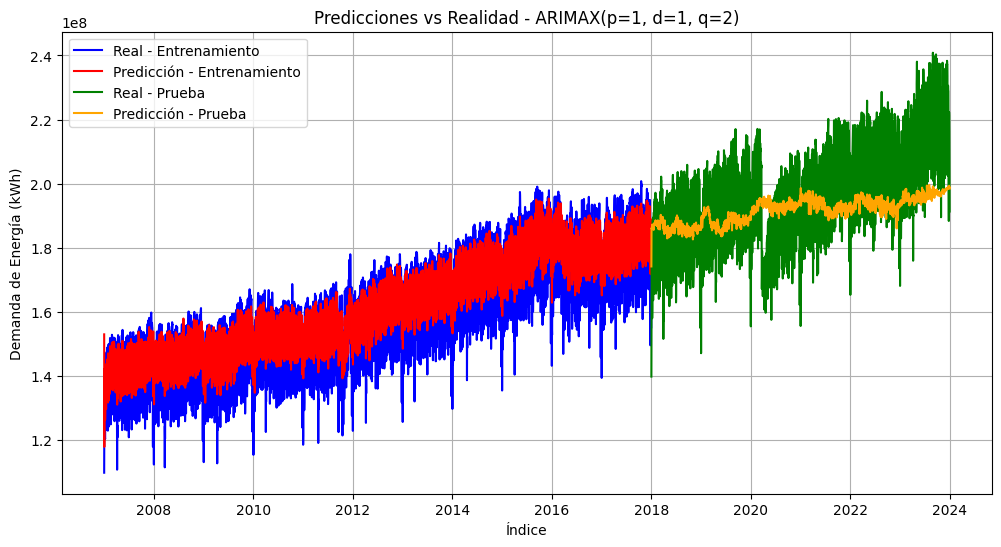

In [30]:
import matplotlib.pyplot as plt

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))

# Graficar el conjunto de entrenamiento (real vs predicción)
plt.plot(train_y, label='Real - Entrenamiento', color='blue')
plt.plot(train_predictions, label='Predicción - Entrenamiento', color='red')

# Graficar el conjunto de prueba (real vs predicción)
plt.plot(test_y.index, test_y, label='Real - Prueba', color='green')
plt.plot(test_y.index, test_predictions, label='Predicción - Prueba', color='orange')

# Añadir etiquetas y título
plt.title("Predicciones vs Realidad - ARIMAX(p=1, d=1, q=2)")
plt.xlabel("Índice")
plt.ylabel("Demanda de Energía (kWh)")
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


Verificación de la normalidad de los residuos

In [31]:
from scipy.stats import jarque_bera

# Obtener los residuos del modelo (asegúrate de haber ajustado previamente el modelo)
residuos = model_arimax_fit.resid

# Realizar la prueba de Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(residuos)

# Imprimir los resultados
print(f"Jarque-Bera statistic: {jb_stat}")
print(f"p-value: {jb_pvalue}")

# Interpretación
if jb_pvalue < 0.05:
    print("Los residuos no siguen una distribución normal (rechazamos la hipótesis nula).")
else:
    print("No hay evidencia suficiente para rechazar la normalidad de los residuos.")


Jarque-Bera statistic: 356.1037247425958
p-value: 4.710409666340989e-78
Los residuos no siguen una distribución normal (rechazamos la hipótesis nula).


### Evaluar residuos

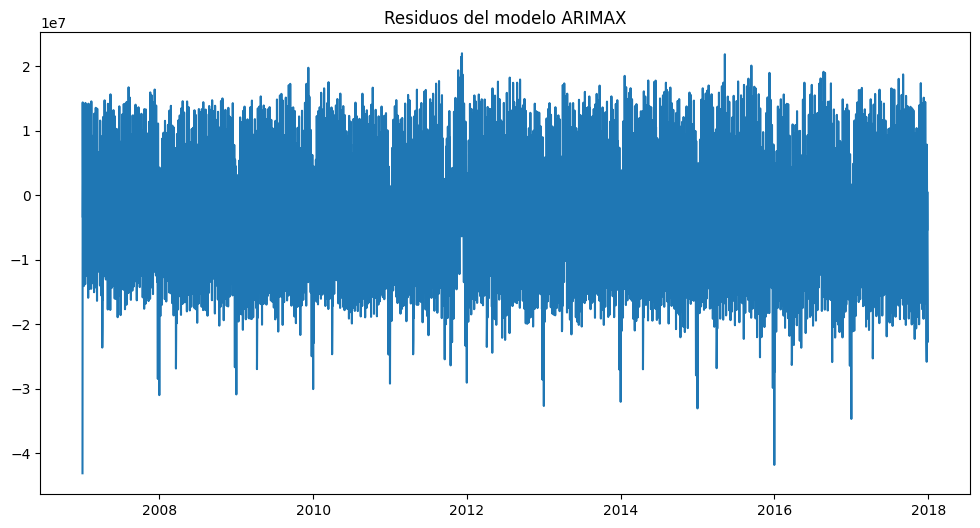

Prueba de estacionariedad de los residuos:
Estadístico ADF: -11.7763820727199
Valor p: 1.0600310228509192e-21
Número de retardos utilizados: 30
Número de observaciones utilizadas para la regresión: 3987
Valores críticos:
   1%: -3.4319912127364143
   5%: -2.8622651980110834
   10%: -2.567156030734827
Conclusión: Rechazamos la hipótesis nula, residuos son estacionarios
Residuos son estacionarios, el modelo es adecuado.


In [32]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Definir la función para realizar la prueba ADF
def test_stationarity(residuals):
    result = adfuller(residuals)
    print(f'Estadístico ADF: {result[0]}')
    print(f'Valor p: {result[1]}')
    print(f'Número de retardos utilizados: {result[2]}')
    print(f'Número de observaciones utilizadas para la regresión: {result[3]}')
    print(f'Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print(f'Conclusión: {"Rechazamos la hipótesis nula, residuos son estacionarios" if result[1] < 0.05 else "No rechazamos la hipótesis nula, residuos no son estacionarios"}')

# Obtener los residuos del modelo ARIMAX
residuals = model_arimax_fit.resid

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo ARIMAX')
plt.show()

# Realizar la prueba ADF sobre los residuos para verificar si son estacionarios
print("Prueba de estacionariedad de los residuos:")
test_stationarity(residuals)  # Llamar la función que realizamos

# Si los residuos no son estacionarios, podemos intentar un modelo distinto
if adfuller(residuals)[1] > 0.05:
    print("Residuos no estacionarios, ajustar modelo.")
else:
    print("Residuos son estacionarios, el modelo es adecuado.")



### Verificar residuos

A pesar de que es el modelo que muestra mejor comportamiento, los residuos no siguen una distribución normal y no se tiene el rango esperado en la predicción, se utilizan diferentes técnicas en busca de tenr un mejor comportamiento.

# **LOGARITMICA**

In [33]:
df['demanda_log'] = np.log(df['Demanda Energia SIN kWh'])  # Agregar 1 para evitar log(0)

# Revisa cómo queda la columna de demanda transformada
print(df[['Demanda Energia SIN kWh', 'demanda_log']].head())

            Demanda Energia SIN kWh  demanda_log
Fecha                                           
2007-01-01             1.098662e+08    18.514774
2007-01-02             1.323110e+08    18.700665
2007-01-03             1.388197e+08    18.748687
2007-01-04             1.405693e+08    18.761211
2007-01-05             1.410687e+08    18.764758


In [34]:
df["demanda_log"].describe()

,demanda_log
count,6209.000000
mean,18.982090
std,0.144024
min,18.514774
25%,18.872640
50%,18.989977
75%,19.089882
max,19.299615


In [35]:
# Asegúrate de que los datos estén ordenados por fecha
df = df.sort_index()  # Esto ordena el DataFrame por el índice, que es 'Fecha'

# Dividir en entrenamiento y prueba según una fecha
train = df[df.index <= '2017-12-31']  # Datos hasta el final de 2017
test = df[df.index > '2017-12-31']    # Datos de 2018 en adelante

# Extraer X (exógenas) y y (dependiente) para entrenamiento y prueba
# Asegúrate de que solo 'Precipitacion (mm)' y 'Temperatura' estén en X
train_X = train[[ 'Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas: Precipitacion y Temperatura
train_y_log  = train['demanda_log']  # Variable dependiente: Demanda Energia
test_X = test[[ 'Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas en test
test_y_log  = test['demanda_log']  # Variable dependiente en test


In [36]:
train_X = np.array(train_X)  # Convierte a array de NumPy si no lo es
test_X = np.array(test_X)

# Verificar las dimensiones
print("Dimensiones de train_X:", train_X.shape)
print("Dimensiones de test_X:", test_X.shape)

Dimensiones de train_X: (4018, 11)
Dimensiones de test_X: (2191, 11)


In [37]:
# Verificar cuántos datos hay en los conjuntos de entrenamiento y prueba
train_size = len(train_X)
test_size = len(test_X)

# Mostrar los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {train_size} datos")
print(f"Tamaño del conjunto de prueba: {test_size} datos")

# Verificar si cumplen con el 70% y 30%
total_size = train_size + test_size
train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

print(f"Porcentaje de datos en el conjunto de entrenamiento: {train_percentage:.2f}%")
print(f"Porcentaje de datos en el conjunto de prueba: {test_percentage:.2f}%")


Tamaño del conjunto de entrenamiento: 4018 datos
Tamaño del conjunto de prueba: 2191 datos
Porcentaje de datos en el conjunto de entrenamiento: 64.71%
Porcentaje de datos en el conjunto de prueba: 35.29%


In [38]:
# Ajuste del modelo ARIMAX (puedes ajustar p, d, q según sea necesario)
p, d, q = 1, 1, 2  # Puedes probar diferentes valores aquí

# Ajustar el modelo ARIMAX logarítmico
model_arimax_log = ARIMA(train_y_log, exog=train_X[:train_size], order=(p, d, q))
model_arimax_log_fit = model_arimax_log.fit()

# Mostrar el resumen del modelo ajustado
print(model_arimax_log_fit.summary())

# Realizar predicciones sobre el conjunto de entrenamiento y prueba
train_predictions_log = model_arimax_log_fit.predict(start=0, end=len(train_y_log) -1 , exog=train_X[:train_size])
test_predictions_log = model_arimax_log_fit.predict(start=len(train_y_log), end=len(train_y_log) + len(test_y_log) -1, exog=test_X)

# Convertir las predicciones de vuelta a la escala original (exp y restar 1)
train_predictions_original_scale = np.exp(train_predictions_log)
test_predictions_original_scale = np.exp(test_predictions_log)

# Calcular el RMSE y MAE en porcentaje comparado con la media de la variable original

# Para el conjunto de entrenamiento
rmse_train = np.sqrt(mean_squared_error(np.exp(train_y_log) , train_predictions_original_scale))
mae_train = mean_absolute_error(np.exp(train_y_log) , train_predictions_original_scale)
r2_train = r2_score(np.exp(train_y_log) , train_predictions_original_scale)

# Para el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(np.exp(test_y_log) , test_predictions_original_scale))
mae_test = mean_absolute_error(np.exp(test_y_log) , test_predictions_original_scale)
r2_test = r2_score(np.exp(test_y_log) , test_predictions_original_scale)

# Calcular la media de la variable original (no logarítmica)
mean_test_y = np.mean(np.exp(test_y_log))

# Calcular el RMSE en porcentaje
rmse_percentage_train = (rmse_train / mean_train_y) * 100
rmse_percentage_test = (rmse_test / mean_test_y) * 100

# Calcular el MAE en porcentaje
mae_percentage_train = (mae_train / mean_train_y) * 100
mae_percentage_test = (mae_test / mean_test_y) * 100

# Imprimir las métricas de error
print("\nMétricas de error (en porcentaje):")
print(f"Entrenamiento - RMSE: {rmse_percentage_train:.2f}%, MAE: {mae_percentage_train:.2f}%, R2: {r2_train:.2f}")
print(f"Prueba - RMSE: {rmse_percentage_test:.2f}%, MAE: {mae_percentage_test:.2f}%, R2: {r2_test:.2f}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            demanda_log   No. Observations:                 4018
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2797.758
Date:                Fri, 21 Feb 2025   AIC                          -5565.517
Time:                        06:11:58   BIC                          -5471.042
Sample:                    01-01-2007   HQIC                         -5532.035
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.072e-07   2.28e-08    -17.826      0.000   -4.52e-07   -3.62e-07
x2             0.0017      0.001      3.234      0.001       0.001       0.003
x3          8.944e-05      0.001      0.123      0.9

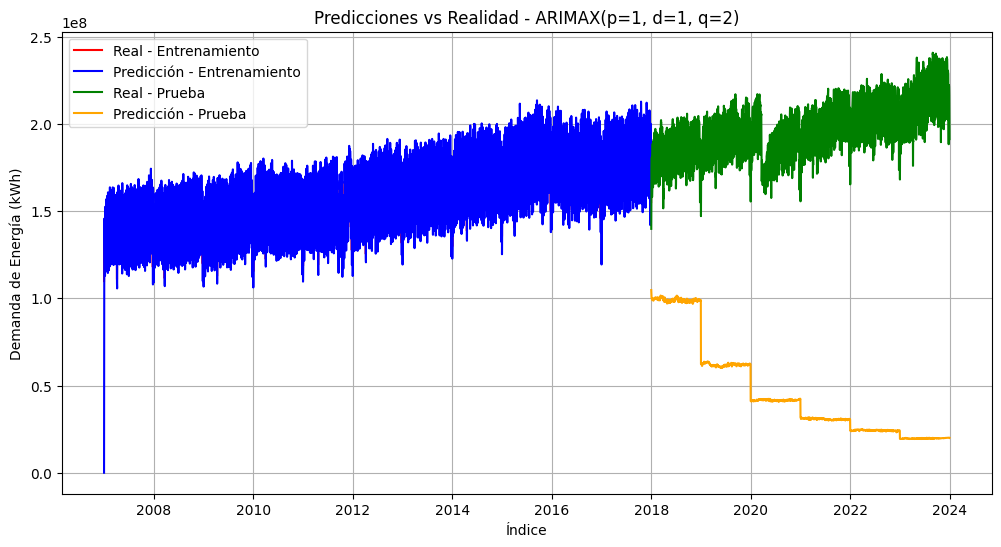

In [39]:
# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar el conjunto de entrenamiento (real vs predicción)
plt.plot(np.exp(train_y_log), label='Real - Entrenamiento', color='red')
plt.plot(train_predictions_original_scale, label='Predicción - Entrenamiento', color='blue')

# Graficar el conjunto de prueba (real vs predicción)
plt.plot(np.exp(test_y_log), label='Real - Prueba', color='green')
plt.plot(test_predictions_original_scale, label='Predicción - Prueba', color='orange')

# Añadir etiquetas y título
plt.title("Predicciones vs Realidad - ARIMAX(p=1, d=1, q=2)")
plt.xlabel("Índice")
plt.ylabel("Demanda de Energía (kWh)")
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


# Escalamiento



In [40]:
print(df[['Demanda Energia SIN kWh',  'Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']].isnull().sum())

Demanda Energia SIN kWh    0
Población                  0
Temp_BOGOTA                0
Temp_ANTIOQUIA             0
Temp_VALLE DEL CAUCA       0
Temp_ATLANTICO             0
Temp_BOLIVAR               0
Temp_CUNDINAMARCA          0
Temp_NORTE DE SANTANDER    0
Temp_SANTANDER             0
Temp_CESAR                 0
Temp_META                  0
dtype: int64


In [41]:
# Asegúrate de que los datos estén ordenados por fecha
df = df.sort_index()  # Esto ordena el DataFrame por el índice, que es 'Fecha'

# Dividir en entrenamiento y prueba según una fecha
train = df[df.index <= '2017-12-31']  # Datos hasta el final de 2017
test = df[df.index > '2017-12-31']    # Datos de 2018 en adelante

# Extraer X (exógenas) y y (dependiente) para entrenamiento y prueba
# Asegúrate de que solo 'Precipitacion (mm)' y 'Temperatura' estén en X
train_X = train[[ 'Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas: Precipitacion y Temperatura
train_y  = train['Demanda Energia SIN kWh']  # Variable dependiente: Demanda Energia
test_X = test[[ 'Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA', 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER', 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas en test
test_y  = test['Demanda Energia SIN kWh']  # Variable dependiente en test


In [42]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos usando StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Escalar los datos de entrenamiento
train_X_scaled = scaler_X.fit_transform(train_X)
train_y_scaled = scaler_y.fit_transform(train_y.values.reshape(-1, 1))

# Escalar los datos de prueba (con el mismo scaler para X y y)
test_X_scaled = scaler_X.transform(test_X)  # Usar transform para evitar filtrado
test_y_scaled = scaler_y.transform(test_y.values.reshape(-1, 1))

# Ajustar el modelo ARIMAX usando los datos de entrenamiento
model = ARIMA(train_y_scaled, exog=train_X_scaled, order=(1, 1, 2))  # Cambia (p, d, q) si es necesario
model_fit = model.fit()

# Realizar predicciones en el conjunto de entrenamiento
train_predictions_scaled = model_fit.predict(start=0, end=len(train_y_scaled)-1, exog=train_X_scaled)
train_predictions_original = scaler_y.inverse_transform(train_predictions_scaled.reshape(-1, 1))

# Realizar predicciones en el conjunto de prueba
test_predictions_scaled = model_fit.predict(start=len(train_y_scaled), end=len(train_y_scaled) + len(test_y_scaled)-1, exog=test_X_scaled)
test_predictions_original = scaler_y.inverse_transform(test_predictions_scaled.reshape(-1, 1))

# Asegurarse de que las predicciones y los valores reales sean unidimensionales
train_predictions_original = train_predictions_original.flatten()
train_y = train_y.values.flatten()
test_predictions_original = test_predictions_original.flatten()
test_y = test_y.values.flatten()

# Calcular las métricas de error para el conjunto de entrenamiento
train_rmse = np.sqrt(mean_squared_error(train_y, train_predictions_original))
train_mae = mean_absolute_error(train_y, train_predictions_original)
train_mape = np.mean(np.abs((train_y - train_predictions_original) / train_y)) * 100
r2_train = r2_score(train_y, train_predictions_original)

# Calcular las métricas de error para el conjunto de prueba
test_rmse = np.sqrt(mean_squared_error(test_y, test_predictions_original))
test_mae = mean_absolute_error(test_y, test_predictions_original)
test_mape = np.mean(np.abs((test_y - test_predictions_original) / test_y)) * 100
r2_test = r2_score(test_y, test_predictions_original)


# Mostrar resultados
print("Errores en el conjunto de entrenamiento:")
print(f"RMSE (Entrenamiento): {train_rmse}")
print(f"MAE (Entrenamiento): {train_mae}")
print(f"R2 (Entrenamiento): {r2_train}")

print("\nErrores en el conjunto de prueba:")
print(f"RMSE (Prueba): {test_rmse}")
print(f"MAE (Prueba): {test_mae}")
print(f"MAPE (Prueba): {test_mape}%")
print(f"R2 (Prueba): {r2_test}")

# Diferencia en los errores
print("\nDiferencia en los errores:")
print(f"Diferencia en RMSE: {test_rmse - train_rmse}")
print(f"Diferencia en MAE: {test_mae - train_mae}")
print(f"Diferencia en MAPE: {test_mape - train_mape}%")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Errores en el conjunto de entrenamiento:
RMSE (Entrenamiento): 9999678.153657088
MAE (Entrenamiento): 8159251.837056926
R2 (Entrenamiento): 0.6880804503399949

Errores en el conjunto de prueba:
RMSE (Prueba): 38439100.48230115
MAE (Prueba): 33605387.82847444
MAPE (Prueba): 16.062538240341098%
R2 (Prueba): -4.587563889099984

Diferencia en los errores:
Diferencia en RMSE: 28439422.328644067
Diferencia en MAE: 25446135.991417512
Diferencia en MAPE: 10.866094882412952%


In [43]:
mean_y = np.mean(df['Demanda Energia SIN kWh'])


rmse_percentage_train = (train_rmse / mean_y) * 100
rmse_percentage_test = (test_rmse / mean_y) * 100
mae_percentage_train = (train_mae / mean_y) * 100
mae_percentage_test = (test_mae / mean_y) * 100

# Mostrar los resultados
print(f"RMSE train: {rmse_percentage_train:.2f}%")
print(f"MAE train: {mae_percentage_train:.2f}%")
print(f"RMSE test : {rmse_percentage_test:.2f}%")
print(f"MAE test: {mae_percentage_test:.2f}%")

RMSE train: 5.65%
MAE train: 4.61%
RMSE test : 21.70%
MAE test: 18.97%


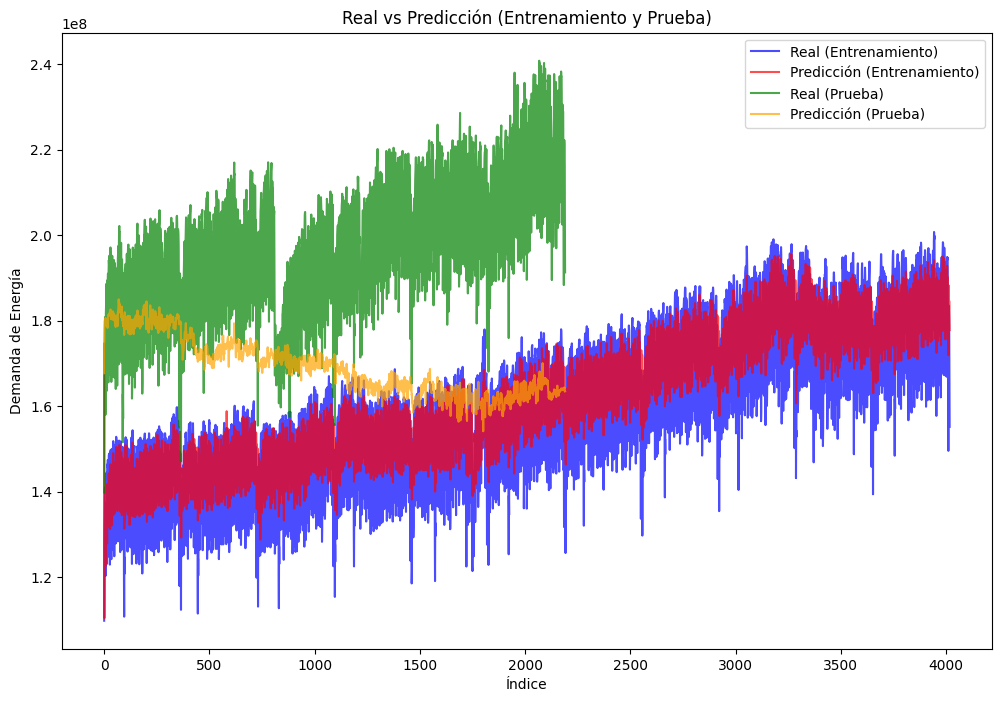

In [44]:
import matplotlib.pyplot as plt

# Graficar Real vs Predicción en un solo gráfico
plt.figure(figsize=(12, 8))

# Graficar entrenamiento
plt.plot(train_y, label='Real (Entrenamiento)', color='blue', alpha=0.7)
plt.plot(train_predictions_original, label='Predicción (Entrenamiento)', color='red', alpha=0.7)

# Graficar prueba
plt.plot(test_y, label='Real (Prueba)', color='green', alpha=0.7)
plt.plot(test_predictions_original, label='Predicción (Prueba)', color='orange', alpha=0.7)

# Título y etiquetas
plt.title('Real vs Predicción (Entrenamiento y Prueba)')
plt.xlabel('Índice')
plt.ylabel('Demanda de Energía')

# Leyenda para diferenciar las series
plt.legend()

# Mostrar el gráfico
plt.show()


# Análisis de correlación

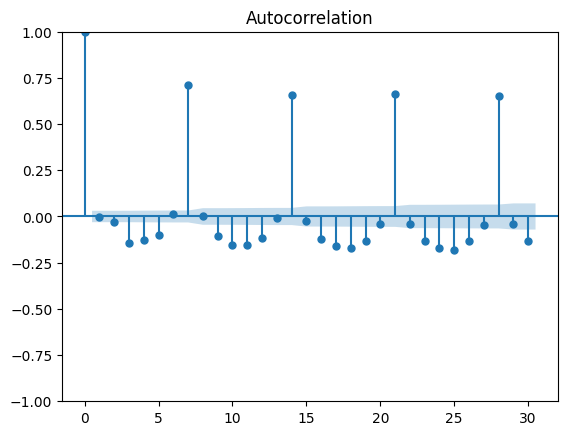

In [45]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gráfico de ACF
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.show()


Se observa un ciclo cada 7 puntos, significa que hay un ciclo y se adapta mejor **SARIMAX**

# SARIMAX

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Extraer X (variables exógenas) y y (variable dependiente) para entrenamiento y prueba

# Variables exógenas: 'Población' y las temperaturas en varias regiones
# Asegúrate de que las columnas seleccionadas sean las correctas
train_X = train[['Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA',
                 'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER',
                 'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas: Población y Temperaturas

# Variable dependiente: 'Demanda Energia SIN kWh' en el conjunto de entrenamiento
train_y = train['Demanda Energia SIN kWh']  # Variable dependiente: Demanda Energia

# Extraer las variables exógenas para el conjunto de prueba
test_X = test[['Población', 'Temp_BOGOTA', 'Temp_ANTIOQUIA', 'Temp_VALLE DEL CAUCA',
               'Temp_ATLANTICO', 'Temp_BOLIVAR', 'Temp_CUNDINAMARCA', 'Temp_NORTE DE SANTANDER',
               'Temp_SANTANDER', 'Temp_CESAR', 'Temp_META']]  # Exógenas en test

# Variable dependiente: 'Demanda Energia SIN kWh' en el conjunto de prueba
test_y = test['Demanda Energia SIN kWh']  # Variable dependiente en test


In [47]:
# Asegúrate de que train_y y test_y son pandas Series con un índice temporal adecuado
# train_X y test_X son tus variables exógenas

# Ajuste del modelo SARIMAX
model = SARIMAX(train_y, exog=train_X, order=(1, 1, 2), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit()


In [48]:
# Predicciones para el conjunto de entrenamiento (train)
train_predictions = model_fit.predict(start=0, end=len(train_y)-1, exog=train_X)

# Predicciones para el conjunto de prueba (test)
predictionsSA = model_fit.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1, exog=test_X)

# Convertir las predicciones en una pandas Series si es necesario, y asignar el índice de test_y
predictionsSA = pd.Series(predictionsSA, index=test_y.index)

# Calcular métricas de error para el conjunto de entrenamiento
train_rmse = np.sqrt(mean_squared_error(train_y, train_predictions))
train_mae = mean_absolute_error(train_y, train_predictions)
train_mape = np.mean(np.abs((train_y - train_predictions) / train_y)) * 100
r2_train = r2_score(train_y, train_predictions)


# Calcular métricas de error para el conjunto de prueba
rmse = np.sqrt(mean_squared_error(test_y, predictionsSA))
mae = mean_absolute_error(test_y, predictionsSA)
mape = np.mean(np.abs((test_y - predictionsSA) / test_y)) * 100
r2_test = r2_score(test_y, predictionsSA)



Errores en el conjunto de entrenamiento:
RMSE (Train): 5886838.938462502
MAE (Train): 3649225.0082419324
MAPE (Train): 2.3456708983313037%
R2 (Train): 0.8918977188254256%

Errores en el conjunto de prueba:
RMSE (Test): 10763182.765611082
MAE (Test): 8870269.474687966
MAPE (Test): 4.483994367502153%
R2 (Test): 0.5619158913905845%


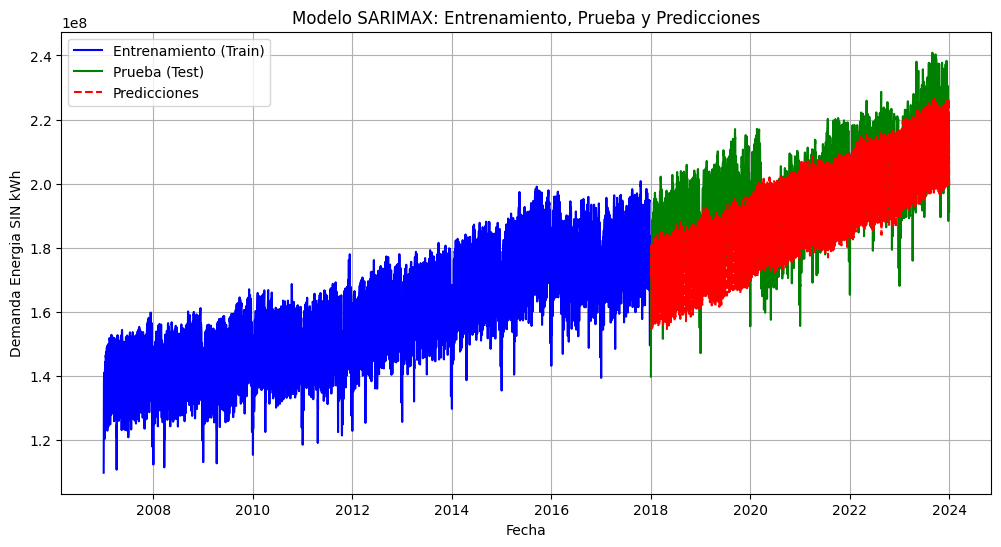

In [49]:
# Mostrar los resultados de los errores
print(f"Errores en el conjunto de entrenamiento:")
print(f"RMSE (Train): {train_rmse}")
print(f"MAE (Train): {train_mae}")
print(f"MAPE (Train): {train_mape}%")
print(f"R2 (Train): {r2_train}%")


print(f"\nErrores en el conjunto de prueba:")
print(f"RMSE (Test): {rmse}")
print(f"MAE (Test): {mae}")
print(f"MAPE (Test): {mape}%")
print(f"R2 (Test): {r2_test}%")

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train_y, label='Entrenamiento (Train)', color='blue')
plt.plot(test_y, label='Prueba (Test)', color='green')
plt.plot(predictionsSA.index, predictionsSA, label='Predicciones', color='red', linestyle='--')
plt.title('Modelo SARIMAX: Entrenamiento, Prueba y Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Demanda Energia SIN kWh')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
mean_y = np.mean(df['Demanda Energia SIN kWh'])


rmse_percentage_train = (train_rmse / mean_y) * 100
rmse_percentage_test = (rmse / mean_y) * 100
mae_percentage_train = (train_mae / mean_y) * 100
mae_percentage_test = (mae / mean_y) * 100

# Mostrar los resultados
print(f"RMSE train: {rmse_percentage_train:.2f}%")
print(f"MAE train: {mae_percentage_train:.2f}%")
print(f"RMSE test : {rmse_percentage_test:.2f}%")
print(f"MAE test: {mae_percentage_test:.2f}%")

RMSE train: 3.32%
MAE train: 2.06%
RMSE test : 6.08%
MAE test: 5.01%


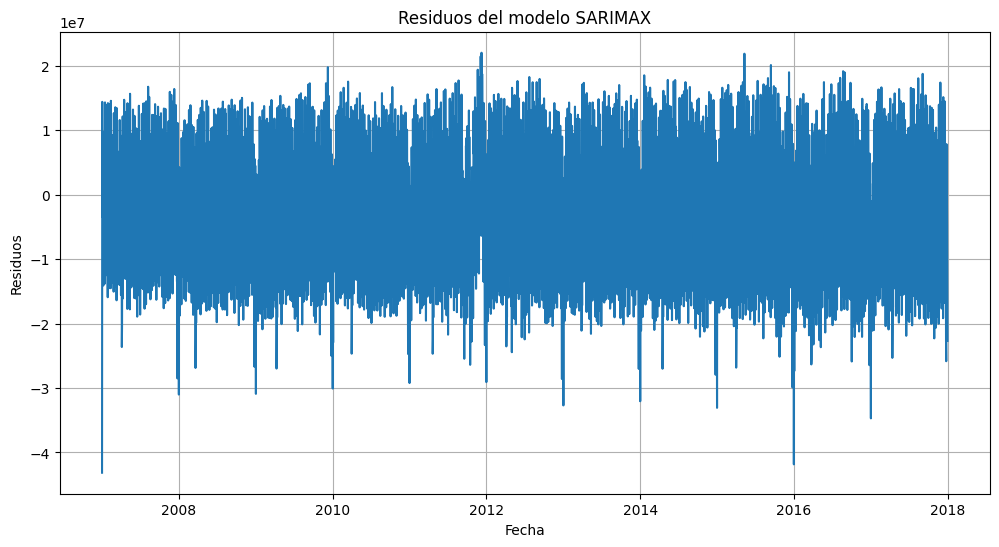

In [51]:
residualsSA = test_y - predictionsSA

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


Verificación de la normalidad de los residuos

In [52]:
from scipy.stats import jarque_bera

# Obtener los residuos del modelo (asegúrate de haber ajustado previamente el modelo)
residualsSA = model_fit.resid

# Realizar la prueba de Jarque-Bera
jb_stat, jb_pvalue = jarque_bera(residualsSA)

# Imprimir los resultados
print(f"Jarque-Bera statistic: {jb_stat}")
print(f"p-value: {jb_pvalue}")

# Interpretación
if jb_pvalue < 0.05:
    print("Los residuos no siguen una distribución normal (rechazamos la hipótesis nula).")
else:
    print("No hay evidencia suficiente para rechazar la normalidad de los residuos.")


Jarque-Bera statistic: 8598.710040237265
p-value: 0.0
Los residuos no siguen una distribución normal (rechazamos la hipótesis nula).


### Verificar residuos

In [53]:
# Verificamos si los residuos son estacionarios
print("Estadístico ADF de los residuos:")
test_stationarity(residualsSA)


Estadístico ADF de los residuos:
Estadístico ADF: -17.20287482117858
Valor p: 6.442632711356362e-30
Número de retardos utilizados: 21
Número de observaciones utilizadas para la regresión: 3996
Valores críticos:
   1%: -3.4319875139327345
   5%: -2.862263564080849
   10%: -2.567155160899137
Conclusión: Rechazamos la hipótesis nula, residuos son estacionarios
